In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Iris Dataset

In [5]:
df=pd.read_csv("iris.csv")
df.head

<bound method NDFrame.head of      Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

Preprocesando los datos:

In [7]:
df_numeric=df.select_dtypes(include=[np.number])
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_numeric)

Aplicando PCA:

In [13]:
pca=PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled) 
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])

explained_variance = pca.explained_variance_ratio_ * 100

print("Varianza explicada por cada componente (%):")
for i, var in enumerate(explained_variance, 1):
    print(f"PC{i}: {var:.2f}%")

print(f"Varianza total explicada: {sum(explained_variance):.2f}%")

Varianza explicada por cada componente (%):
PC1: 72.96%
PC2: 22.85%
PC3: 3.67%
Varianza total explicada: 99.48%


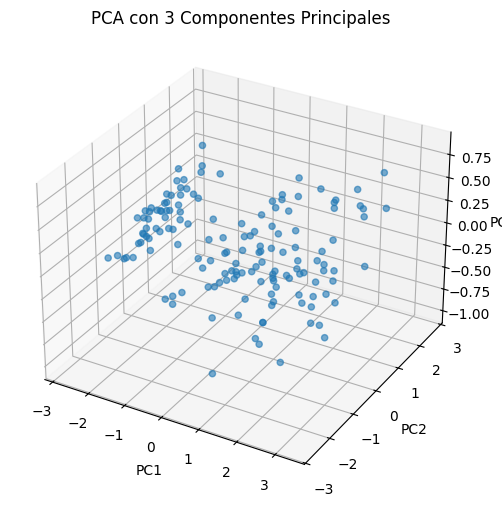

In [12]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], alpha=0.6)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA con 3 Componentes Principales")
plt.show()

## Brain Tumor


In [21]:
df2=pd.read_csv("Brain Tumor.csv")
df2.drop(columns=["Class"])
df2.head

<bound method NDFrame.head of           Image  Class       Mean     Variance  Standard Deviation   Entropy  \
0        Image1      0   6.535339   619.587845           24.891522  0.109059   
1        Image2      0   8.749969   805.957634           28.389393  0.266538   
2        Image3      1   7.341095  1143.808219           33.820234  0.001467   
3        Image4      1   5.958145   959.711985           30.979219  0.001477   
4        Image5      0   7.315231   729.540579           27.010009  0.146761   
...         ...    ...        ...          ...                 ...       ...   
3757  Image3758      0  21.234512  1208.850174           34.768523  0.063774   
3758  Image3759      0  20.435349  1227.151440           35.030721  0.066763   
3759  Image3760      0  18.011520  1151.582765           33.934978  0.068396   
3760  Image3761      0  13.330429   945.732779           30.752769  0.087872   
3761  Image3762      0   6.110138   480.884025           21.929068  0.118171   

      Ske

Preprocesando los datos:

In [17]:
df2_numeric=df.select_dtypes(include=[np.number])
scaler=StandardScaler()
df2_scaled=scaler.fit_transform(df2_numeric)

Porcentaje de aporte de cada vector propio:

In [18]:
varianza_explicada = pca.explained_variance_ratio_

for i, var in enumerate(varianza_explicada):
    print(f"Componente {i+1}: {var*100:.2f}% de la varianza explicada")

print(f"Varianza total explicada: {sum(varianza_explicada)*100:.2f}%")


Componente 1: 43.28% de la varianza explicada
Componente 2: 28.91% de la varianza explicada
Componente 3: 12.22% de la varianza explicada
Varianza total explicada: 84.40%


¿Cuántos componentes principales son necesarios para obtener al menos el 90% de datos?

In [27]:
# varianza explicada acumulada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
n_componentes = np.argmax(varianza_acumulada >= 0.90) + 1  # +1 porque los índices comienzan en 0

print(f"Se necesitan {n_componentes} componentes principales para explicar al menos el 90% de la varianza.")


Se necesitan 1 componentes principales para explicar al menos el 90% de la varianza.


proyección de la data original al espacio reducido mediante 2 métodos y comparar resultados:
## método directo usando sklearn

In [31]:
pca=PCA(n_components=2)
df2_pca_sklearn= pca.fit_transform(df2_scaled)
print(f"varianza explicada por los 2 componentes:{pca.explained_variance_ratio_* 100}")
df2_pca_sklearn=pd.DataFrame(df2_pca_sklearn, columns=["PC1","OC2"])


varianza explicada por los 2 componentes:[43.27635709 28.90827925]


## método por proyección manual (multuplicación de matrices)

In [34]:
componentes_principales = pca.components_ 
df2_pca_manual = np.dot(df_scaled, componentes_principales.T)
df2_pca_manual = pd.DataFrame(df2_pca_manual, columns=["PC1", "PC2"])


In [42]:
df2_pca_sklearn.columns = ["PC1", "PC2"]
df2_pca_manual.columns = ["PC1", "PC2"]

Comparación:

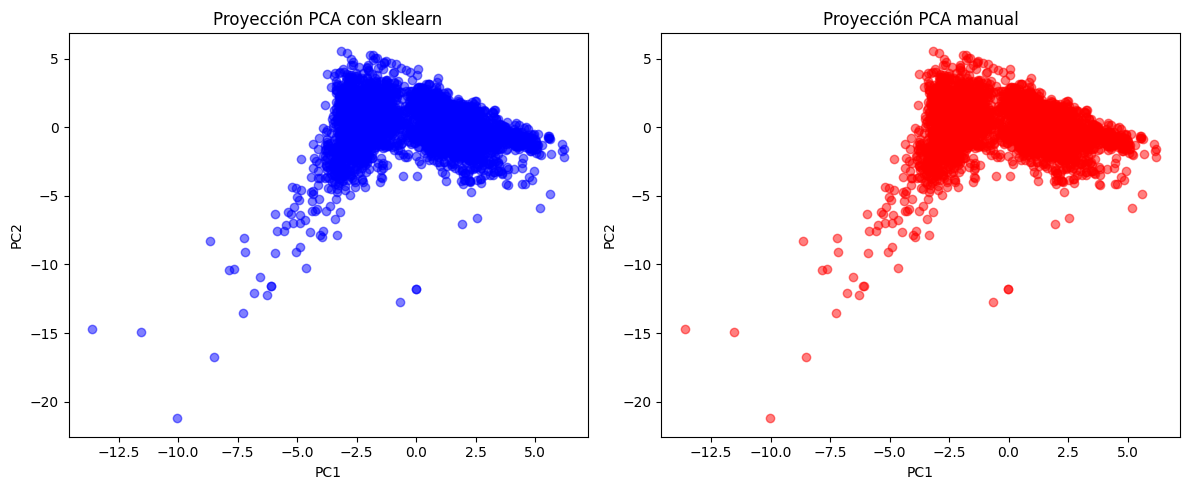

In [43]:
plt.figure(figsize=(12,5))

# Gráfico de PCA con sklearn
plt.subplot(1,2,1)
plt.scatter(df2_pca_sklearn["PC1"], df2_pca_sklearn["PC2"], c='blue', alpha=0.5)
plt.title("Proyección PCA con sklearn")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Gráfico de PCA manual
plt.subplot(1,2,2)
plt.scatter(df2_pca_manual["PC1"], df2_pca_manual["PC2"], c='red', alpha=0.5)
plt.title("Proyección PCA manual")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()



Comparación de los pairplot con la data original y la data proyectada

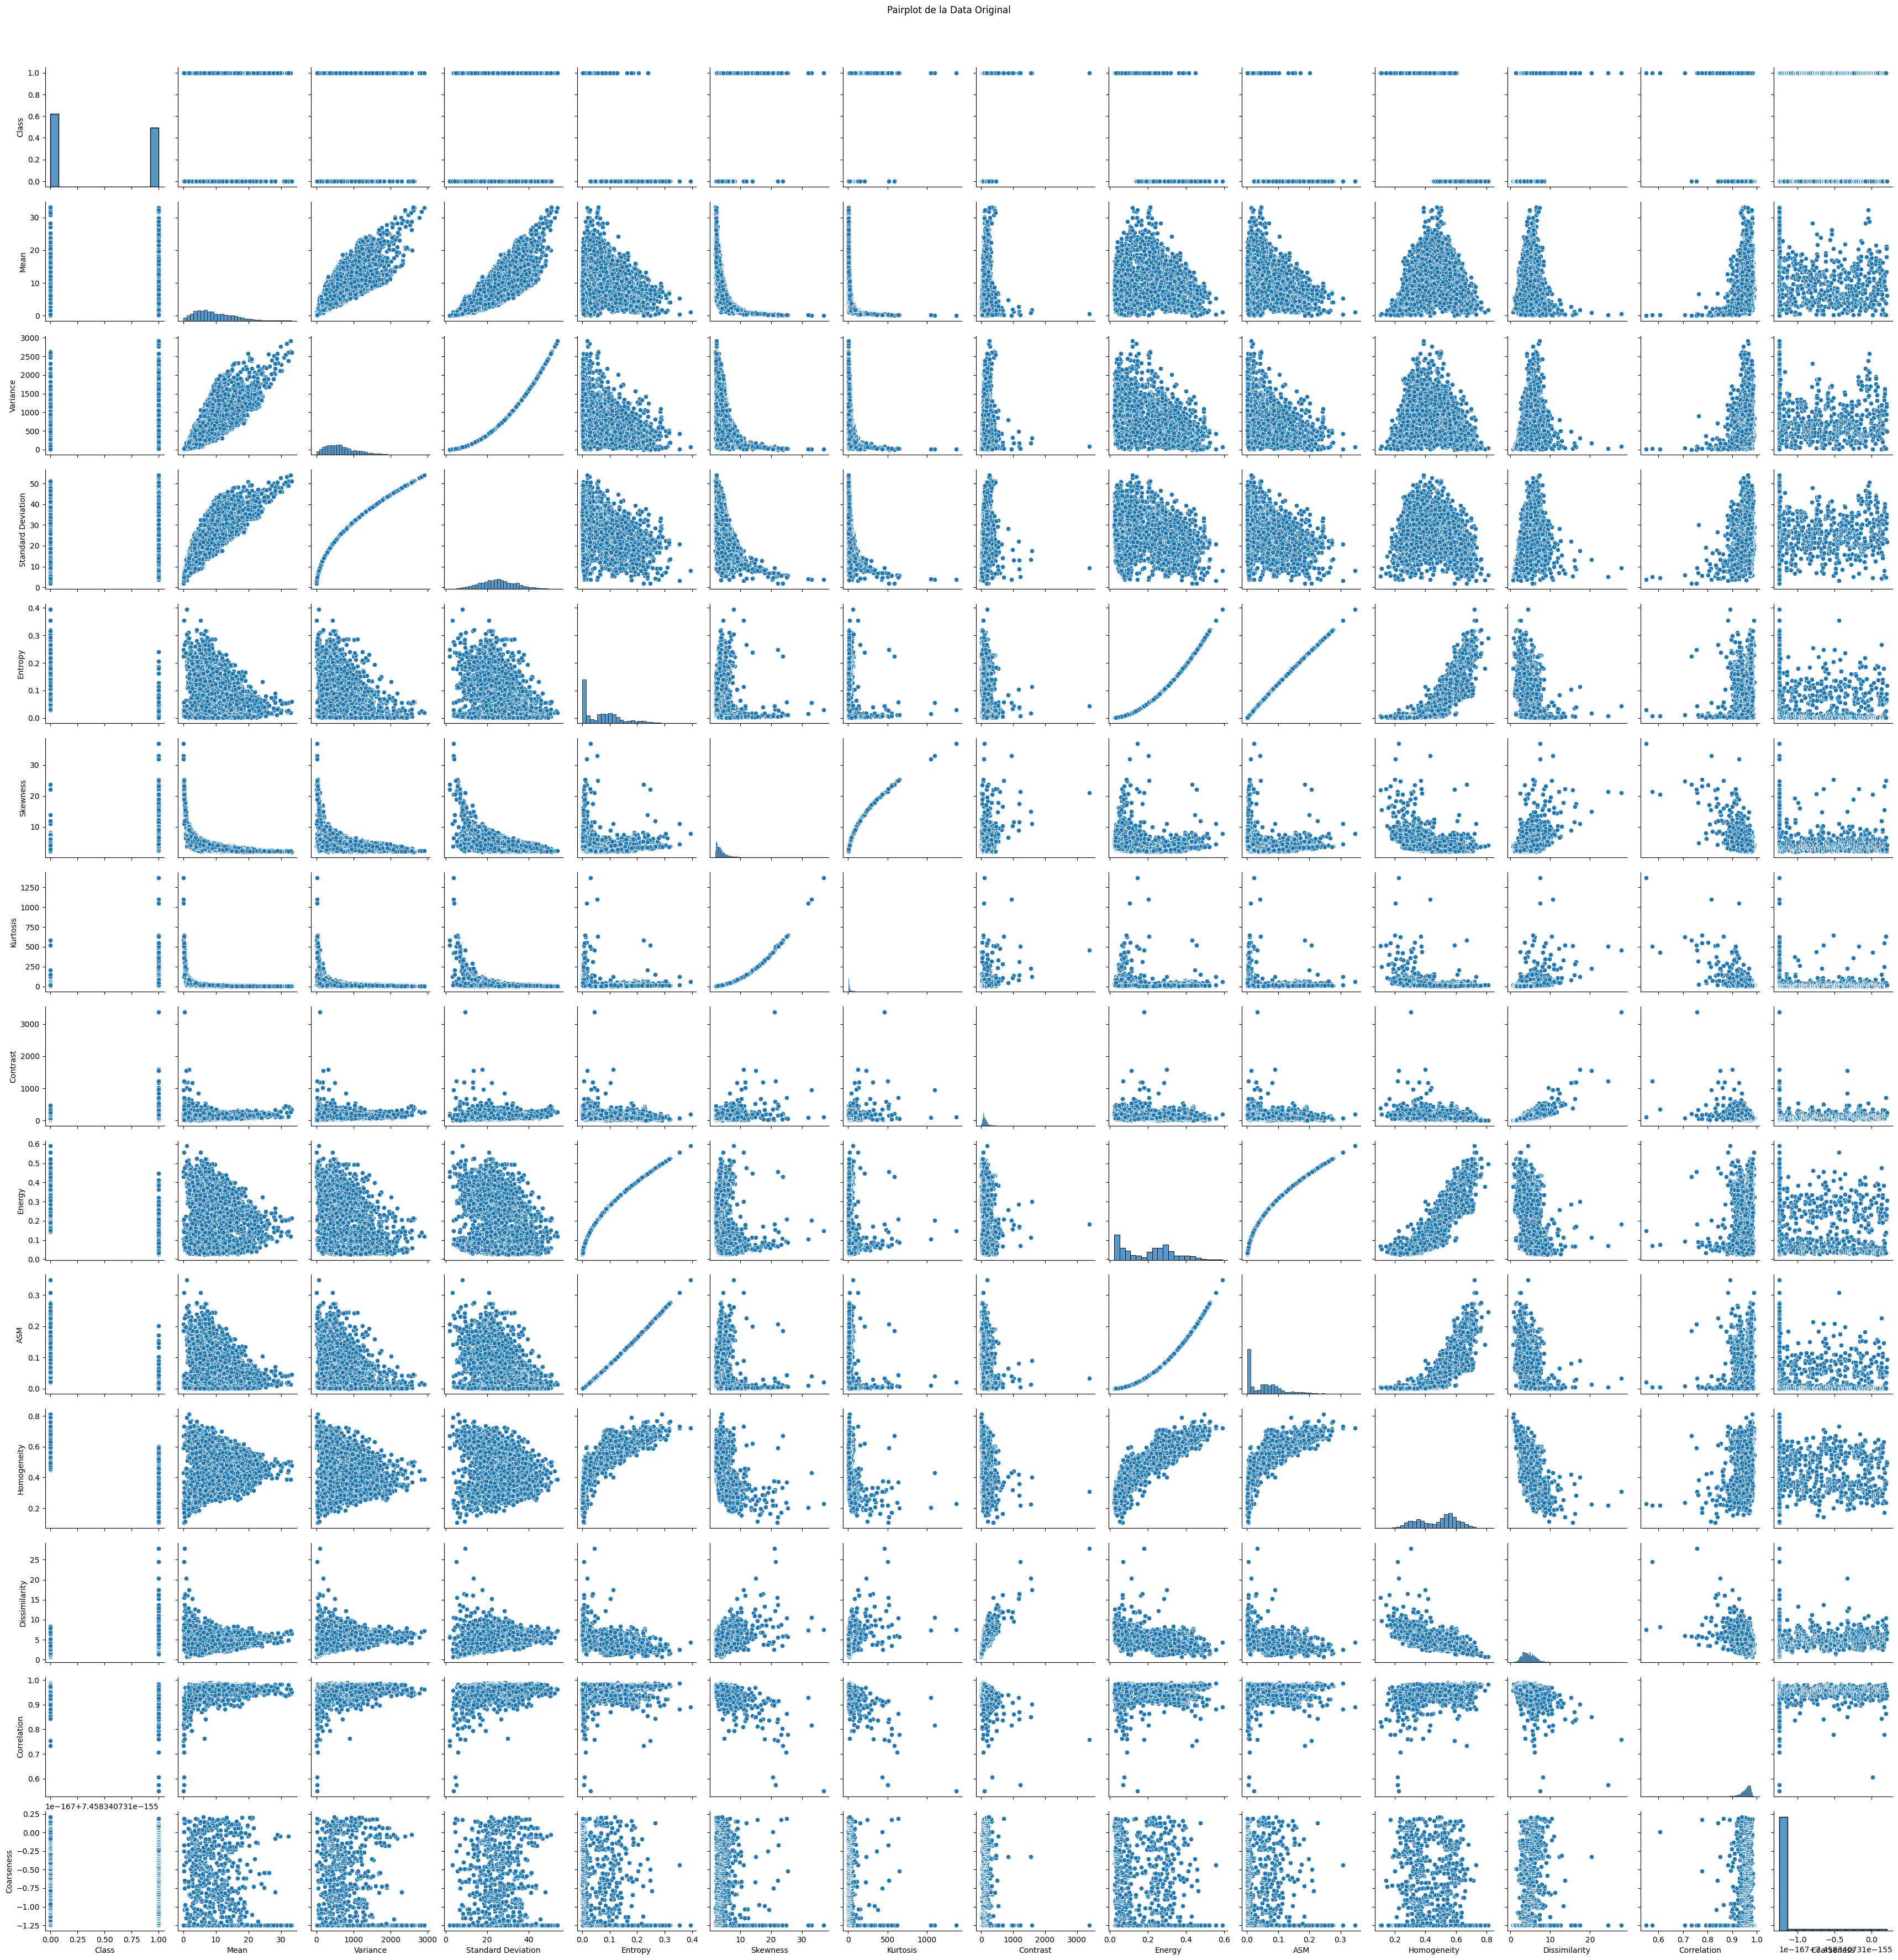

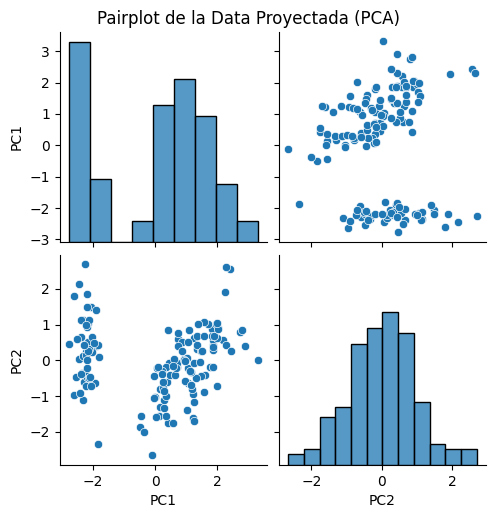

In [18]:
pca = PCA(n_components=2)
df2_pca = pca.fit_transform(df2_scaled)
df2_pca = pd.DataFrame(df2_pca, columns=["PC1", "PC2"])

sns.pairplot(df2)
plt.suptitle("Pairplot de la Data Original", y=1.02)
plt.show()

sns.pairplot(df2_pca)
plt.suptitle("Pairplot de la Data Proyectada (PCA)", y=1.02)
plt.show()
